IMPORT LIBRARIES

In [227]:
import pandas as pd
import numpy as np
import os

IMPORT DATA, INPUT THE DAILY AND FINAL N-SIZE

There need to be 2 sheets in the input, "data" and "codesheet". "codesheet" is set-up to track and count the quota from the "data" sheet

In [228]:
File_path=r'/Users/giangtrongnguyen/Python/Portfolio/Codesheet Set-up/Statewide CA TX OH FL WI n100.xlsx'
codesheet = pd.read_excel(File_path, sheet_name='codesheet')
data = pd.read_excel(File_path, sheet_name='data')

daily_target=100
final_target=300

The initial codesheet will look like below. Users need to set-up these basic information. The "Column" column is used to define which column (from "data" sheet) will be used to track the quota for each criteria. The "Code" column defines how a value is coded in the "data" sheet

In [229]:
codesheet

,Criteria,Column,Code,Quota
0,Gender,NaN,NaN,NaN
1,Male,genderf,1.0,0.50
2,Female,genderf,2.0,0.50
3,NaN,NaN,NaN,NaN
4,Age,NaN,NaN,NaN
5,18-34,agef,1.0,0.20
6,35-49,agef,2.0,0.30
7,50-64,agef,3.0,0.30
8,65+,agef,4.0,0.20
9,NaN,NaN,NaN,NaN


This is how a "data" sheet looks like

In [230]:
data

,id,submitdate,Modetype,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,genderf,agef,racef,homef,statef,SEX,AGE,ETHNICITY,HOME_OWNER,STATE
0,1,2025-04-01,3,2,3,4,2,3,3,4,...,1,2,3,2,4,Male,49,Hispanic,No,FL
1,2,2025-04-01,3,4,5,3,3,1,2,2,...,1,1,1,2,2,Male,33,White,No,TX
2,3,2025-04-01,2,2,4,3,2,5,2,9,...,2,4,3,1,2,Female,70,Hispanic,Yes,TX
3,4,2025-04-01,2,3,4,2,4,4,4,4,...,1,1,1,1,2,Male,20,White,Yes,TX
4,5,2025-04-01,4,1,3,3,3,1,1,3,...,2,4,4,1,2,Female,87,Asian,Yes,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2025-04-05,4,2,6,2,4,5,5,5,...,2,1,4,1,1,Female,19,Asian,Yes,CA
96,97,2025-04-05,2,2,4,1,4,4,3,2,...,2,2,1,1,2,Female,44,White,Yes,TX
97,98,2025-04-05,1,3,2,3,1,4,3,1,...,2,4,4,2,2,Female,70,Asian,No,TX
98,99,2025-04-05,4,2,1,5,5,1,1,1,...,2,2,4,1,5,Female,40,Asian,Yes,WI


The purpose of this set of codes is to set-up the formulas and adjust some format so that users could look into the codesheet and learn:
- How many responses from each value needs submitting in daily basis
- How many responses there are currently
- How much each value needs more (or less) to meet the daily target and final target


CREATE ADDITIONAL COLUMNS

In [231]:
codesheet['Need']=np.nan
codesheet['Have']=np.nan
codesheet['Percent']=np.nan
codesheet['Diff']=np.nan
codesheet['End Need']=np.nan
codesheet['End Diff']=np.nan
codesheet[final_target]=np.nan

codesheet['Code'] = codesheet['Code'].astype('object')
codesheet['Need'] = codesheet['Need'].astype('object')
codesheet['Have'] = codesheet['Have'].astype('object')
codesheet['Percent'] = codesheet['Percent'].astype('object')
codesheet['Diff'] = codesheet['Diff'].astype('object')
codesheet['End Need'] = codesheet['End Need'].astype('object')
codesheet['End Diff'] = codesheet['End Diff'].astype('object')


codesheet.rename(columns={'Criteria': daily_target}, inplace=True)


CREATE A FUNCTION TO CONVERT THE NUMERIC COLUMN LOCATION ON PYTHON TO TEXT COLUMN LOCATION ON EXCEL

In [232]:
def index_to_excel_column(n):
 result = ''
 while n >= 0:
    result = chr(n % 26 + ord('A')) + result
    n = n // 26 - 1
 return result

APPLY THE FUNCTION TO THE RELEVANT COLUMNS

In [233]:
quota_col_loc=index_to_excel_column(codesheet.columns.get_loc('Quota'))
have_col_loc=index_to_excel_column(codesheet.columns.get_loc('Have'))
daily_target_col_loc=index_to_excel_column(codesheet.columns.get_loc(daily_target))
percent_col_loc=index_to_excel_column(codesheet.columns.get_loc('Percent'))
n_size_col_loc=index_to_excel_column(codesheet.columns.get_loc(final_target))
end_need_col_loc=index_to_excel_column(codesheet.columns.get_loc('End Need'))
code_col_loc=index_to_excel_column(codesheet.columns.get_loc('Code'))


CREATE FORMULA FOR EACH COLUMNS

In this step, the formulas are input in text data type. When swiching to Excel file, Excel will automatically detect the formula with "=" and display the result instead of the formulas themselves

To be specific, here are the definition of each column:
- NEED: the cummulative amount of response that is required to submit
- HAVE: the current amount of data that the project has
- PERCENT: the perecentage of each option (no. of each option divide by the total amount of responses)
- DIFF: the different percentage of the one that should be submitted and the one that the project currently has
- END NEED: the total responses that are needed by the end of the project
- END DIFF: the difference between what is currently have and the that maximun that could be submitted

In [234]:
for i in range(len(codesheet['Need'])):
    if not pd.isna(codesheet.loc[i, 'Column']):
        codesheet.loc[i, 'Need']=f'=IF(${quota_col_loc}{i+2}*{daily_target_col_loc}$1=0,"",${quota_col_loc}{i+2}*{daily_target_col_loc}$1)'
        codesheet.loc[i, 'Percent']=f'={have_col_loc}{i+2}/{daily_target_col_loc}$1'
        codesheet.loc[i, 'Have']=f"=COUNTIFS(data!${index_to_excel_column(data.columns.get_loc(codesheet.loc[i, 'Column']))}:${index_to_excel_column(data.columns.get_loc(codesheet.loc[i, 'Column']))}, ${code_col_loc}{i+2})"
 
    if not pd.isna(codesheet.loc[i, 'Quota']):
        codesheet.loc[i, 'Diff']=f'={percent_col_loc}{i+2}-{quota_col_loc}{i+2}'
        codesheet.loc[i, 'End Need']=f'={quota_col_loc}{i+2}*{n_size_col_loc}$1'
        codesheet.loc[i, 'End Diff']=f'={end_need_col_loc}{i+2}-{have_col_loc}{i+2}'

CREATE 2 MORE EMPTY ROW TO THE DATAFRAME

In [235]:
empty_rows = pd.DataFrame([[np.nan] * len(codesheet.columns)] * 2, columns=codesheet.columns)
codesheet = pd.concat([codesheet, empty_rows], ignore_index=True)

ADD SUM VALUE FOR EACH CRITERIA IN THE "HAVE" COLUMN AND CLEAN-UP A BIT

In [236]:
for i in range(1, len(codesheet['Have'])-1):
    if (not pd.isna(codesheet.loc[i, 'Have'])) & pd.isna(codesheet.loc[i-1, 'Have']):
       a=i+2
    if (not pd.isna(codesheet.loc[i, 'Have'])) & pd.isna(codesheet.loc[i+1, 'Have']):
       b=i+2
    if pd.isna(codesheet.loc[i, 'Have']) & pd.isna(codesheet.loc[i+1, 'Have']):
       codesheet.loc[i, 'Have']=f'=SUM({have_col_loc}{a}:{have_col_loc}{b})' 

for i in range(len(codesheet['Code'])-1):
   if pd.isna(codesheet['Code'][i]) & (not pd.isna(codesheet['Code'][i+1])):
      codesheet.loc[i, 'Code'] = codesheet.loc[i + 1, 'Column']
   
   codesheet.loc[i, 'Column'] = np.nan 

codesheet.rename(columns={'Column': ' '}, inplace=True)

COLLECTING A LIST FOR BOLD FORMAT AND A LIST FOR CONDITIONAL FORMAT

In [237]:
bold_list = [] 
conditional_formatting_list = []

for i in range(len(codesheet['Code'])):
    if ((not pd.isna(codesheet.loc[i, daily_target])) & (not pd.isna(codesheet.loc[i, 'Code'])) & (pd.isna(codesheet.loc[i, 'Have']))) or ((pd.isna(codesheet.loc[i, daily_target])) & (pd.isna(codesheet.loc[i, 'Code'])) & (not pd.isna(codesheet.loc[i, 'Have']))):
     bold_list.append(i)
     
    if (not pd.isna(codesheet.loc[i, 'Diff'])):
        conditional_formatting_list.append(i)

OUTPUT

In [238]:
output_folder = os.path.dirname(File_path)
output_path = os.path.join(output_folder, 'With new codesheet.xlsx')
os.makedirs(os.path.dirname(output_path), exist_ok=True)

In [239]:
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
 

# Write the "data" sheet to the new Excel file
    data.to_excel(writer, sheet_name='data', index=False, header=False, startrow=1)
    workbook = writer.book
    worksheet_data = writer.sheets['data']

    header_format = workbook.add_format({'bold': False, 'border': 0})

    for col_num, col_name in enumerate(data.columns):
        worksheet_data.write(0, col_num, col_name, header_format)

# Write the "codesheet" dataframe to the new Excel file
    codesheet.to_excel(writer, sheet_name='codesheet', index=False, header=False, startrow=1)
    worksheet_codesheet = writer.sheets['codesheet']

    # Format header
    header_format_noborder = workbook.add_format({
    'bold': True,
    'align': 'center',
    'valign': 'vcenter',
    'border': 0
    })

    for col_num, col_name in enumerate(codesheet.columns):
        worksheet_codesheet.write(0, col_num, col_name, header_format_noborder)
 
    # Set columns format: interger
    integer_center_format = workbook.add_format({
    'num_format': '0',
    'align': 'center'
    })

    worksheet_codesheet.set_column(codesheet.columns.get_loc('Code'), codesheet.columns.get_loc(final_target), 12, integer_center_format)

    # Set columns format: percent
    percent_center_format = workbook.add_format({
    'num_format': '0%',
    'align': 'center'
    })
 
    percent_format = workbook.add_format({'num_format': '0.00%'})
    worksheet_codesheet.set_column(codesheet.columns.get_loc('Quota'), codesheet.columns.get_loc('Quota'), 12, percent_center_format )
    worksheet_codesheet.set_column(codesheet.columns.get_loc('Percent'), codesheet.columns.get_loc('Diff'), 12, percent_center_format )

    # Set columns format: conditional formatting - End Diff column
    highlight_end_diff_format = workbook.add_format({'bg_color': "#FF322B"})

    End_diff_col_idx = codesheet.columns.get_loc('End Diff')
    start_row = 1 
    end_row = len(codesheet)

    col_letter = chr(ord('A') + End_diff_col_idx)

    cell_range = f'{col_letter}{start_row+1}:{col_letter}{end_row+1}'

    worksheet_codesheet.conditional_format(cell_range, {
    'type': 'cell',
    'criteria': '<',
    'value':0,
    'format': highlight_end_diff_format
    })

    # Set columns format: conditional formatting - Diff column
    highlight_diff_format = workbook.add_format({'bg_color': "#33CC47"})

    for i in conditional_formatting_list:
        worksheet_codesheet.conditional_format(f"{index_to_excel_column(codesheet.columns.get_loc('Diff'))}{i+2}", 
                                               {
        'type': 'cell',
        'criteria': 'between',
        'minimum': -0.03,
        'maximum': 0.03,
        'format': highlight_diff_format
        })

    # Set format: bold for specific cells   
    bold_left_format = workbook.add_format({'bold': True, 'align': 'left'})
    bold_center_format = workbook.add_format({'bold': True, 'align': 'center'})

    for i in bold_list:
        if not pd.isna(codesheet.iloc[i, codesheet.columns.get_loc(daily_target)]):
            value = codesheet.iloc[i, codesheet.columns.get_loc(daily_target)]
            worksheet_codesheet.write(i + 1, codesheet.columns.get_loc(daily_target), value, bold_left_format)
    
        if not pd.isna(codesheet.iloc[i, codesheet.columns.get_loc('Code')]):
            value = codesheet.iloc[i, codesheet.columns.get_loc('Code')]
            worksheet_codesheet.write(i + 1, codesheet.columns.get_loc('Code'), value, bold_center_format)
   
        if not pd.isna(codesheet.iloc[i, codesheet.columns.get_loc('Have')]):
            value = codesheet.iloc[i, codesheet.columns.get_loc('Have')]
            worksheet_codesheet.write(i + 1, codesheet.columns.get_loc('Have'), value, bold_center_format)

In [241]:
print(f"✅ The file is successfully exported at: {output_path}")

✅ The file is successfully exported at: /Users/giangtrongnguyen/Python/Portfolio/Codesheet Set-up/With new codesheet.xlsx


The final codesheet will look like this. All the columns that have values starting with "=" will be detected as formula and displayed as result of calculation in the Excel file 

In [242]:
codesheet

,100,,Code,Quota,Need,Have,Percent,Diff,End Need,End Diff,300
0,Gender,NaN,genderf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,NaN,1.0,0.50,"=IF($D3*A$1=0,"""",$D3*A$1)","=COUNTIFS(data!$N:$N, $C3)",=F3/A$1,=G3-D3,=D3*K$1,=I3-F3,NaN
2,Female,NaN,2.0,0.50,"=IF($D4*A$1=0,"""",$D4*A$1)","=COUNTIFS(data!$N:$N, $C4)",=F4/A$1,=G4-D4,=D4*K$1,=I4-F4,NaN
3,NaN,NaN,NaN,NaN,NaN,=SUM(F3:F4),NaN,NaN,NaN,NaN,NaN
4,Age,NaN,agef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18-34,NaN,1.0,0.20,"=IF($D7*A$1=0,"""",$D7*A$1)","=COUNTIFS(data!$O:$O, $C7)",=F7/A$1,=G7-D7,=D7*K$1,=I7-F7,NaN
6,35-49,NaN,2.0,0.30,"=IF($D8*A$1=0,"""",$D8*A$1)","=COUNTIFS(data!$O:$O, $C8)",=F8/A$1,=G8-D8,=D8*K$1,=I8-F8,NaN
7,50-64,NaN,3.0,0.30,"=IF($D9*A$1=0,"""",$D9*A$1)","=COUNTIFS(data!$O:$O, $C9)",=F9/A$1,=G9-D9,=D9*K$1,=I9-F9,NaN
8,65+,NaN,4.0,0.20,"=IF($D10*A$1=0,"""",$D10*A$1)","=COUNTIFS(data!$O:$O, $C10)",=F10/A$1,=G10-D10,=D10*K$1,=I10-F10,NaN
9,NaN,NaN,NaN,NaN,NaN,=SUM(F7:F10),NaN,NaN,NaN,NaN,NaN


Here is the original codesheet before applying the code

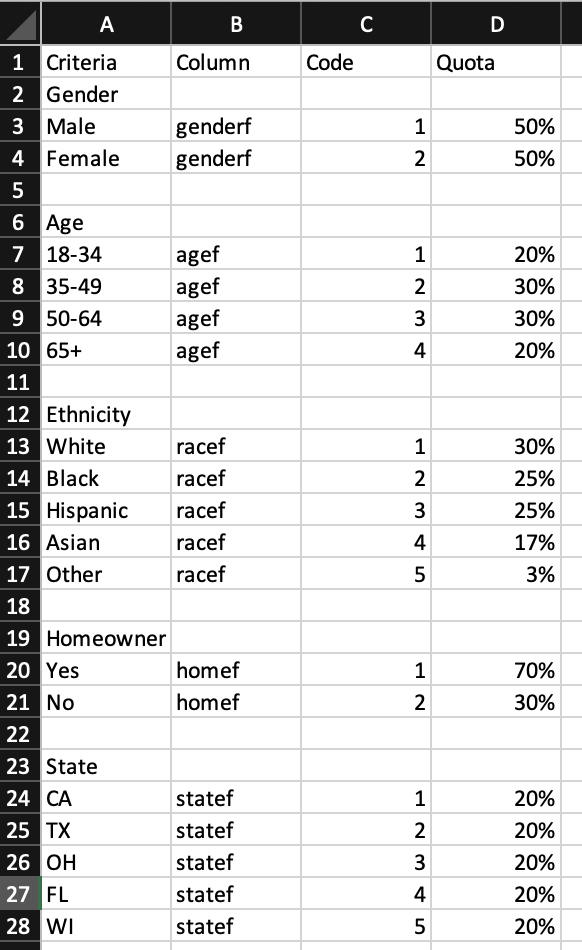

In [243]:
from IPython.display import Image
Image("/Users/giangtrongnguyen/Desktop/Ảnh màn hình 2025-07-21 lúc 22.12.22.png")  # đường dẫn tương đối hoặc tuyệt đối

Here is the version after using the code

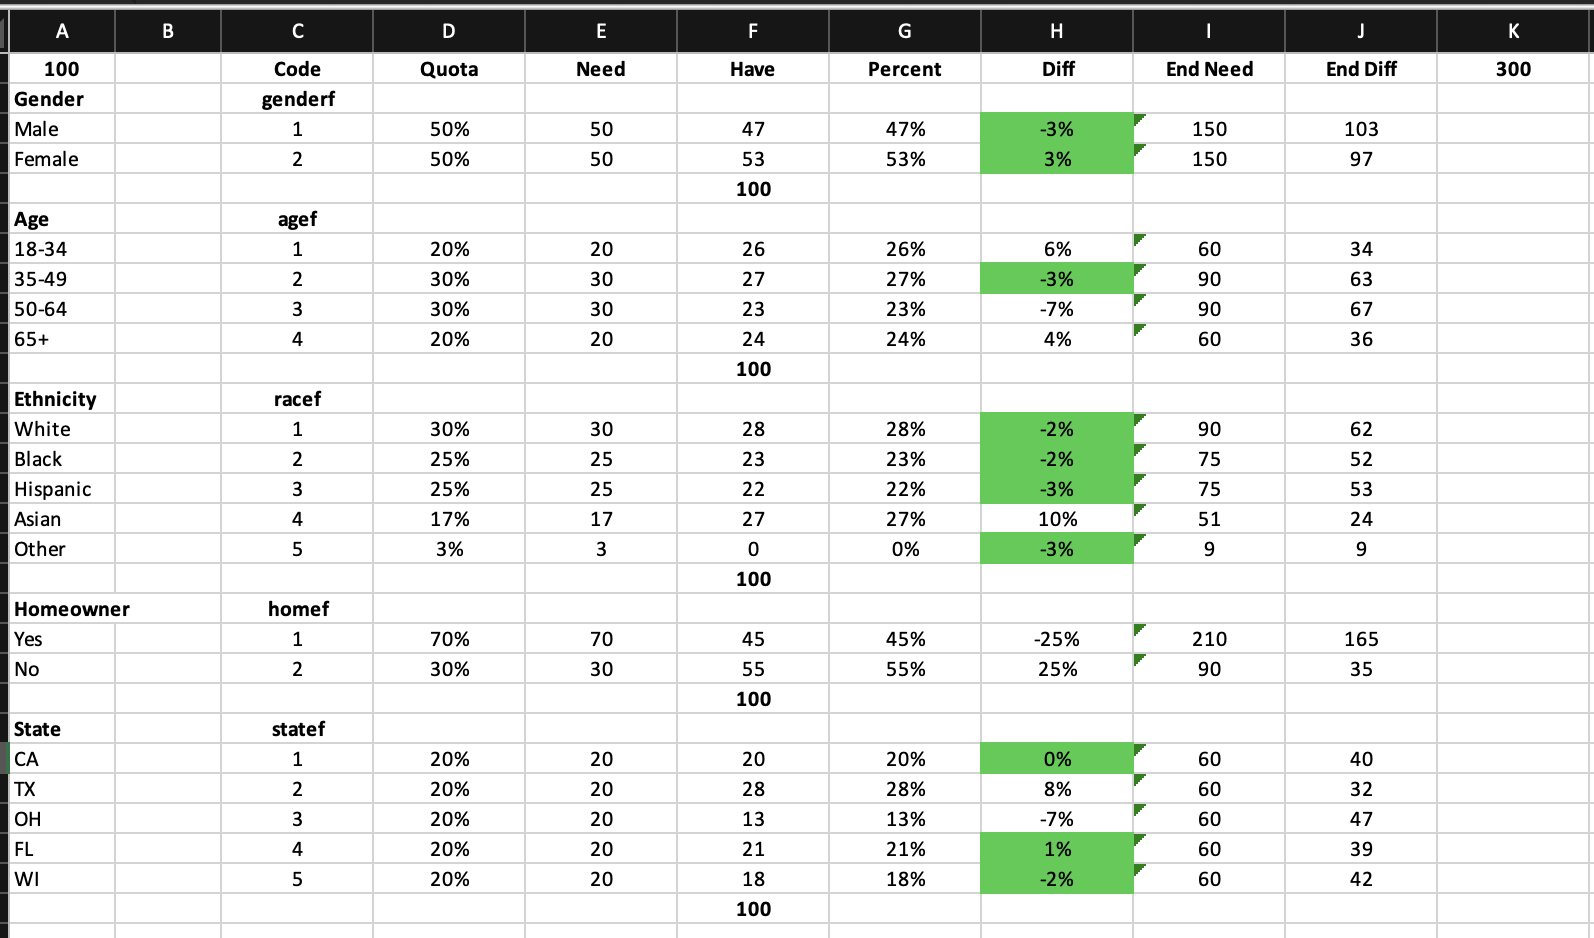

In [244]:
Image('/Users/giangtrongnguyen/Desktop/Ảnh màn hình 2025-07-21 lúc 22.19.28.png')